Dataset Loaded Successfully!
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

/tmp/ipython-input-4109255767.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-4109255767.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr


🌲 Random Forest Results:
Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[89 16]
 [18 56]]


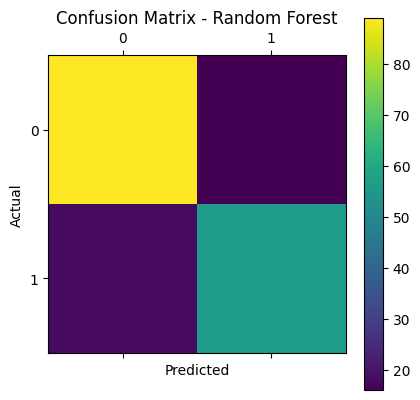

In [ ]:
# ---------------------------------------------
# Titanic Survival Prediction Project
# ---------------------------------------------

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ---------------------------------------------
# Load Dataset
# ---------------------------------------------
df = pd.read_csv("Titanic-Dataset.csv")   # Change filename if needed
print("Dataset Loaded Successfully!")
print(df.head())

# ---------------------------------------------
# Check for Missing Values
# ---------------------------------------------
print("\nMissing Values:")
print(df.isnull().sum())

# Handle Missing Data
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)   # Too many missing
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# ---------------------------------------------
# Encode Categorical Columns
# ---------------------------------------------
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])

# ---------------------------------------------
# Select Useful Columns
# ---------------------------------------------
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = df[features]
y = df['Survived']

# ---------------------------------------------
# Train Test Split
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------
# Logistic Regression Model
# ---------------------------------------------
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("\n🚢 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# ---------------------------------------------
# Random Forest Model (Better Accuracy)
# ---------------------------------------------
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n🌲 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# ---------------------------------------------
# Confusion Matrix
# ---------------------------------------------
cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.matshow(cm)
plt.title("Confusion Matrix - Random Forest")
plt.colorbar()
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
